In [1]:
import numpy as np

# Define the parameters for the Rossler system
a_rossler = 0.5
b_rossler = 2.0
c_rossler = 4.0

# Define the parameters for the Lorenz system
a_lorenz = 10
b_lorenz = 28
c_lorenz = 8 / 3

# Define the time step for Euler approximation
dt = 0.01

# Define the total simulation time
total_time = 100

# Define the time points
time_points = np.arange(0, total_time, dt)

# Initialize the state vectors for Rossler and Lorenz systems
rossler_states = np.zeros((len(time_points), 3))
lorenz_states = np.zeros((len(time_points), 3))

# Set the initial conditions
rossler_states[0] = [1, 1, 1]
lorenz_states[0] = [1, 1, 1]

# Simulate the Rossler system using Euler approximation
for i in range(1, len(time_points)):
    x, y, z = rossler_states[i - 1]
    dx = -y - z
    dy = x + a_rossler * y
    dz = b_rossler + z * (x - c_rossler)
    rossler_states[i] = rossler_states[i - 1] + dt * np.array([dx, dy, dz])
    
# Simulate the Lorenz system using Euler approximation
for i in range(1, len(time_points)):
    x, y, z = lorenz_states[i - 1]
    dx = a_lorenz * (y - x)
    dy = x * (b_lorenz - z) - y
    dz = x * y - c_lorenz * z
    lorenz_states[i] = lorenz_states[i - 1] + dt * np.array([dx, dy, dz])

# Split the data into training and test sets
train_size = int(len(time_points) * 0.8)
rossler_train = rossler_states[:train_size]
rossler_test = rossler_states[train_size:]
lorenz_train = lorenz_states[:train_size]
lorenz_test = lorenz_states[train_size:]

rossler_train.shape, rossler_test.shape, lorenz_train.shape, lorenz_test.shape


((8000, 3), (2000, 3), (8000, 3), (2000, 3))

In [3]:
# Correct the targets and reservoir states history for training
targets_rossler = rossler_train[1:]
targets_lorenz = lorenz_train[1:]
reservoir_states_history_rossler = reservoir_states_history_rossler[:-1]
reservoir_states_history_lorenz = reservoir_states_history_lorenz[:-1]

# Train the output weights using ridge regression (Rossler system)
model_rossler = Ridge(alpha=alpha)
model_rossler.fit(reservoir_states_history_rossler, targets_rossler)

# Train the output weights using ridge regression (Lorenz system)
model_lorenz = Ridge(alpha=alpha)
model_lorenz.fit(reservoir_states_history_lorenz, targets_lorenz)

# Test the trained models on the test data
predictions_rossler = np.zeros_like(rossler_test)
predictions_lorenz = np.zeros_like(lorenz_test)
for i in range(len(rossler_test) - 1):
    u_rossler = rossler_test[i]
    u_lorenz = lorenz_test[i]
    reservoir_state_rossler = (1 - a) * reservoir_state_rossler + a * np.tanh(A @ reservoir_state_rossler + W_in_rossler @ u_rossler)
    reservoir_state_lorenz = (1 - a) * reservoir_state_lorenz + a * np.tanh(A @ reservoir_state_lorenz + W_in_lorenz @ u_lorenz)
    predictions_rossler[i + 1] = model_rossler.predict(reservoir_state_rossler.reshape(1, -1))
    predictions_lorenz[i + 1] = model_lorenz.predict(reservoir_state_lorenz.reshape(1, -1))

# Calculate the mean squared error for the predictions
mse_rossler = np.mean((predictions_rossler - rossler_test) ** 2)
mse_lorenz = np.mean((predictions_lorenz - lorenz_test) ** 2)

mse_rossler, mse_lorenz


(0.4449970374330831, 1.8864922191730487)

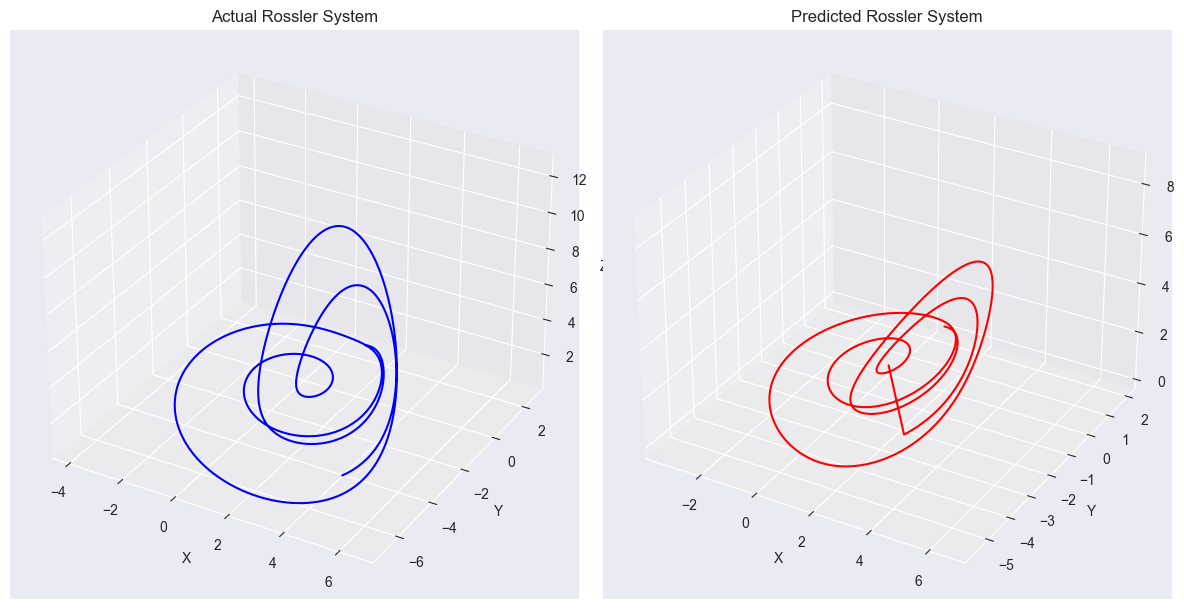

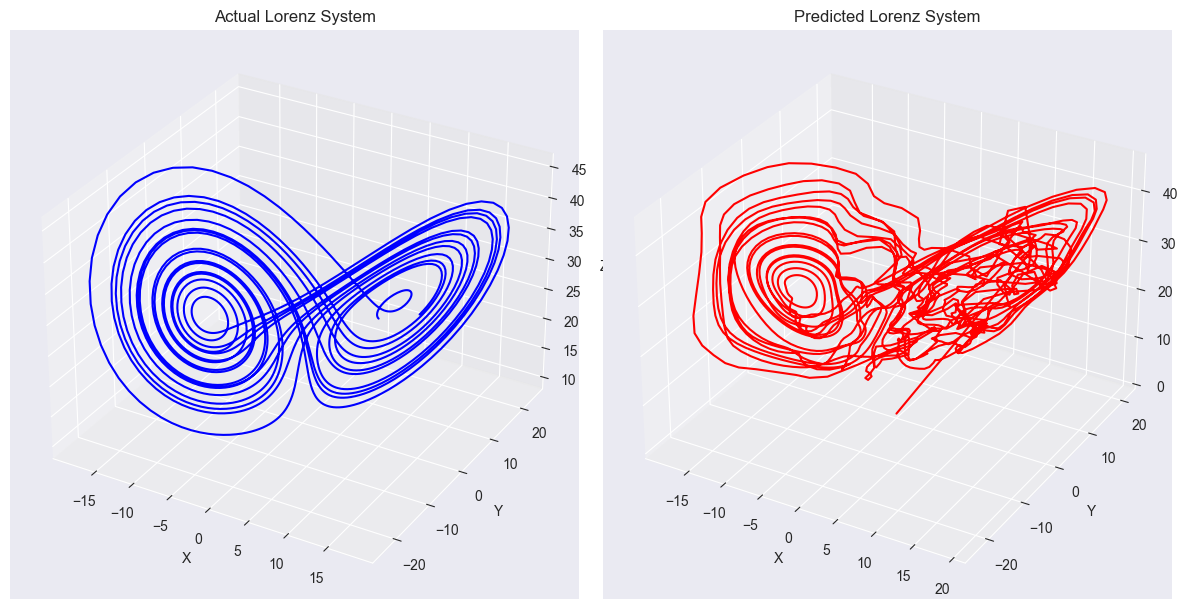

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to create 3D trajectory plots
def plot_trajectory(actual, predicted, title):
    fig = plt.figure(figsize=(12, 6))

    # Plot the actual trajectory
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(actual[:, 0], actual[:, 1], actual[:, 2], 'b-')
    ax1.set_title('Actual ' + title)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot the predicted trajectory
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot(predicted[:, 0], predicted[:, 1], predicted[:, 2], 'r-')
    ax2.set_title('Predicted ' + title)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.tight_layout()
    plt.show()

# Plot the 3D trajectories for the Rossler system
plot_trajectory(rossler_test, predictions_rossler, 'Rossler System')

# Plot the 3D trajectories for the Lorenz system
plot_trajectory(lorenz_test, predictions_lorenz, 'Lorenz System')


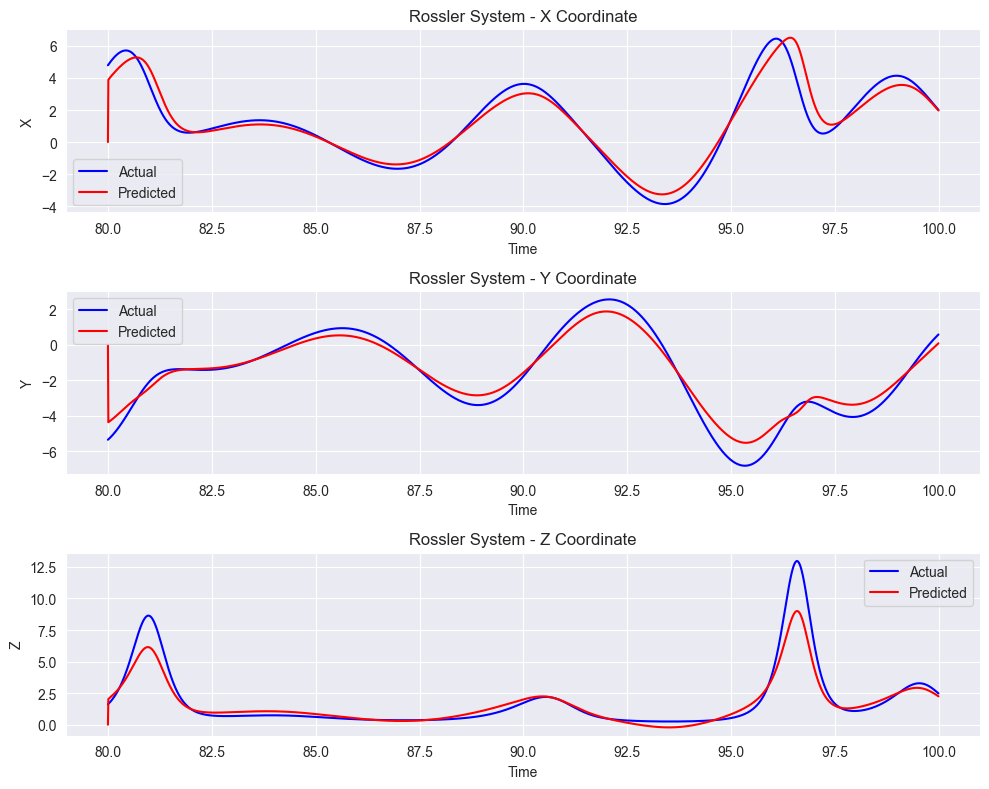

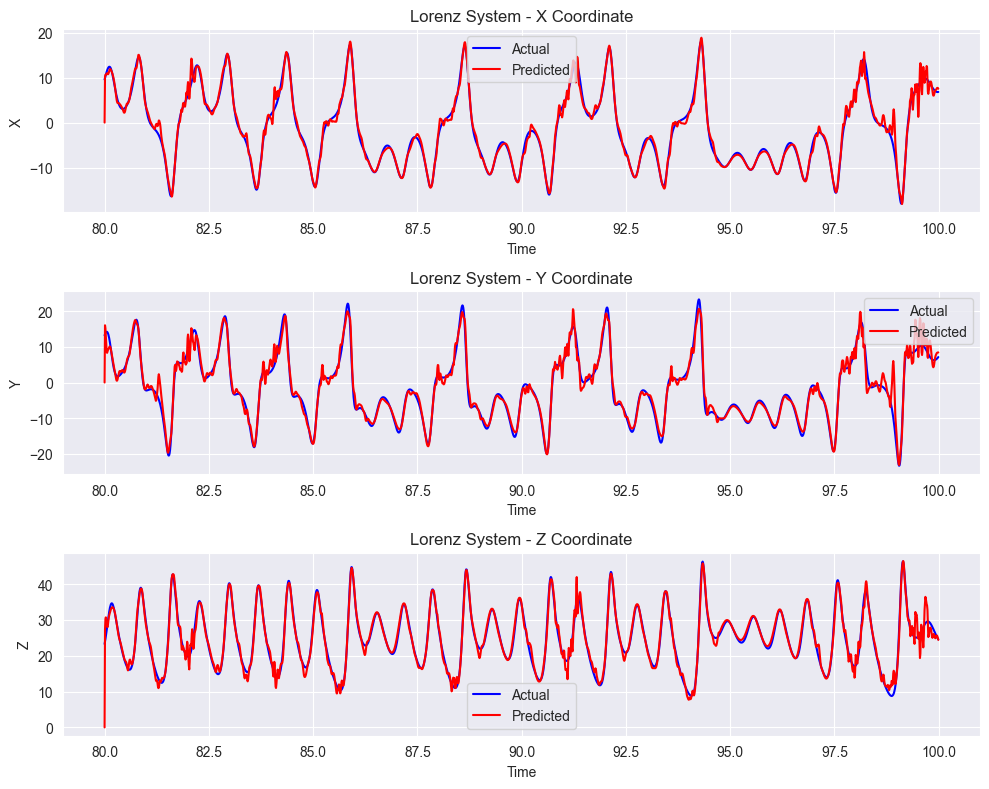

In [5]:
# Define the function to create time series plots
def plot_time_series(actual, predicted, title):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
    
    # Plot the time series for each coordinate
    for i, coord in enumerate(['X', 'Y', 'Z']):
        ax = axes[i]
        ax.plot(time_points[train_size:], actual[:, i], 'b-', label='Actual')
        ax.plot(time_points[train_size:], predicted[:, i], 'r-', label='Predicted')
        ax.set_title(f'{title} - {coord} Coordinate')
        ax.set_xlabel('Time')
        ax.set_ylabel(coord)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the time series for the Rossler system
plot_time_series(rossler_test, predictions_rossler, 'Rossler System')

# Plot the time series for the Lorenz system
plot_time_series(lorenz_test, predictions_lorenz, 'Lorenz System')
